Name - Aditya Kothari 

Roll no. - I028

Batch - B1

Aim - To highlight the edges and to determine histogram of orientation of the given image.

Repeat the same for any other image.

In [1]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt


Getting the image from skimage

In [2]:
image = data.coins()

Plotting the image

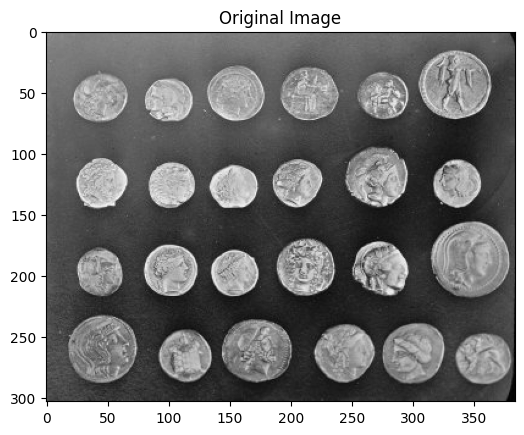

In [15]:
[rw,col] = image.shape
plt.title("Original Image")
plt.imshow(image, cmap = 'gray')

Sobel Filter for determining change in intensity

In [4]:
gx = cv2.Sobel(image, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize=3) #In x direction
gy = cv2.Sobel(image, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize=3) #In y direction

gxabs = cv2.convertScaleAbs(gx)
gyabs = cv2.convertScaleAbs(gy)


Plotting the images

Text(0.5, 1.0, 'Sobel Y')

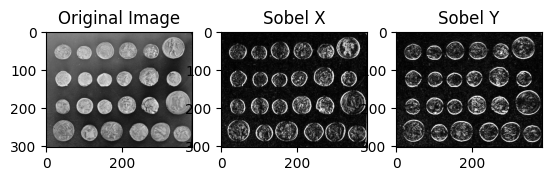

In [5]:
plt.subplot(1,3,1)
plt.imshow(image, cmap = 'gray')
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(gxabs, cmap = 'gray')
plt.title("Sobel X")
plt.subplot(1,3,3)
plt.imshow(gyabs, cmap = 'gray')
plt.title("Sobel Y")


In [6]:
edge_mag = np.sqrt(np.abs(gx**2)+np.abs(gy**2))
edge_mag_abs = cv2.convertScaleAbs(edge_mag)
edge_mag

array([[  0.      , 276.      ,  10.      , ...,  28.      ,  14.      ,
          0.      ],
       [206.      , 248.22974 ,  62.1289  , ...,  53.14132 ,  11.045361,
          2.      ],
       [ 60.      ,  88.56636 ,  36.05551 , ..., 122.09013 ,   7.071068,
         16.      ],
       ...,
       [ 12.      ,  44.922153,  42.544094, ...,  24.083189,   8.485281,
          8.      ],
       [ 20.      ,  58.137768,  48.332184, ...,   8.246211,  14.142136,
         12.      ],
       [  0.      ,  74.      ,  52.      , ...,   2.      ,  12.      ,
          0.      ]], dtype=float32)

Combining the filters

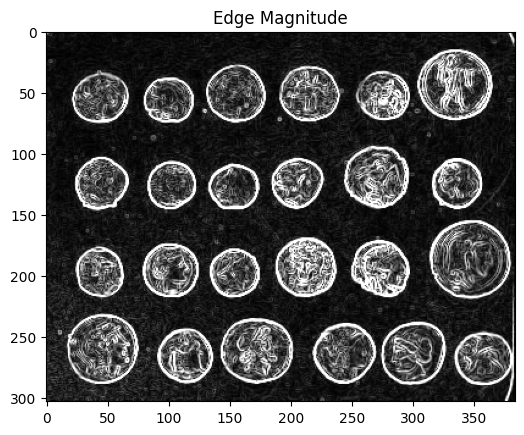

In [14]:
plt.title("Edge Magnitude")
plt.imshow(edge_mag_abs, cmap = 'gray')

In [8]:
edge_orient = (np.arctan2(gyabs,gxabs) * 180 / np.pi)%180
edge_orient

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [90.   , 33.5  , 86.4  , ..., 19.8  ,  5.195, 90.   ],
       [90.   ,  6.49 , 86.9  , ..., 19.62 , 81.94 , 90.   ],
       ...,
       [90.   , 16.83 , 23.56 , ...,  4.766, 45.   , 90.   ],
       [90.   ,  3.945, 24.44 , ..., 14.04 , 45.   , 90.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]],
      dtype=float16)

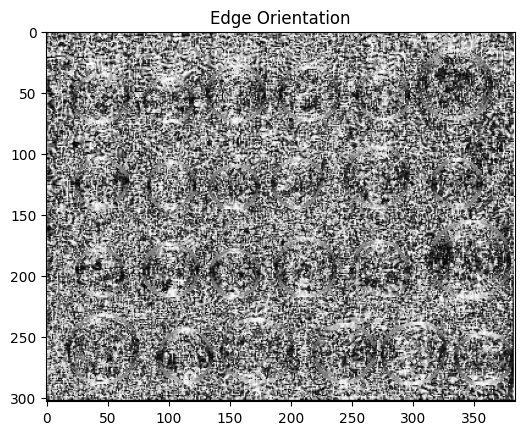

In [13]:
plt.title("Edge Orientation")
plt.imshow(edge_orient, cmap = 'gray')

Plotting them together for comparison

Text(0.5, 1.0, 'Edge Orientation')

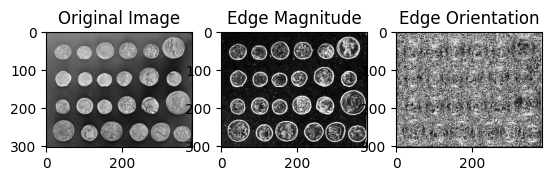

In [10]:
plt.subplot(1,3,1)
plt.imshow(image, cmap = 'gray')
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(edge_mag_abs, cmap = 'gray')
plt.title("Edge Magnitude")
plt.subplot(1,3,3)
plt.imshow(edge_orient, cmap = 'gray')
plt.title("Edge Orientation")


In [11]:
edge_orient1D = np.reshape(edge_orient, (rw*col,1))
edge_orient1D

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float16)

Plotting the Histogram

Text(0, 0.5, 'Frequency')

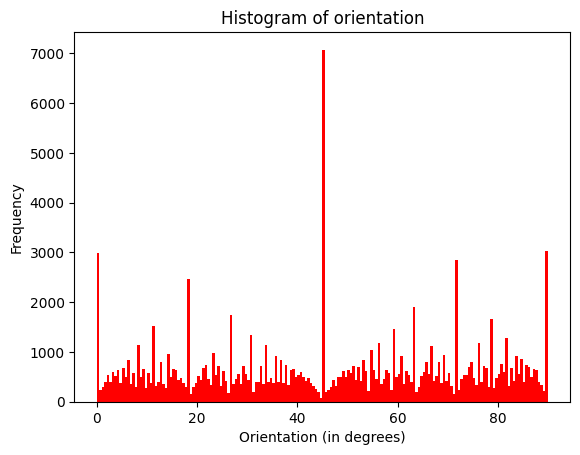

In [12]:
plt.hist(edge_orient1D, bins = 180, color="red")
plt.title("Histogram of orientation")
plt.xlabel("Orientation (in degrees)")
plt.ylabel("Frequency")

**Filter size = 11**

In [25]:
gx = cv2.Sobel(image, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize=11) #In x direction
gy = cv2.Sobel(image, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize=11) #In y direction

gxabs = cv2.convertScaleAbs(gx)
gyabs = cv2.convertScaleAbs(gy)


Plotting the images

Text(0.5, 1.0, 'Sobel Y')

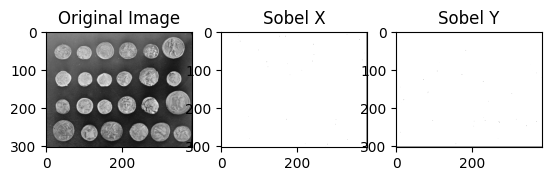

In [26]:
plt.subplot(1,3,1)
plt.imshow(image, cmap = 'gray')
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(gxabs, cmap = 'gray')
plt.title("Sobel X")
plt.subplot(1,3,3)
plt.imshow(gyabs, cmap = 'gray')
plt.title("Sobel Y")


Combining the filters

In [27]:
edge_mag = np.sqrt(np.abs(gx**2)+np.abs(gy**2))
edge_mag_abs = cv2.convertScaleAbs(edge_mag)
edge_mag

array([[0.0000000e+00, 2.0483980e+06, 2.2063280e+06, ..., 6.9879480e+06,
        3.2414500e+06, 0.0000000e+00],
       [1.3303160e+06, 2.1037118e+06, 1.9951271e+06, ..., 7.3965490e+06,
        3.6262200e+06, 7.8625400e+05],
       [1.2973560e+06, 1.5724181e+06, 1.2883220e+06, ..., 8.2783335e+06,
        4.5356090e+06, 1.5686480e+06],
       ...,
       [1.0908000e+05, 1.0724088e+06, 1.4338601e+06, ..., 7.9358981e+05,
        1.8804611e+05, 3.7462000e+04],
       [2.2218000e+04, 1.1929341e+06, 1.5846215e+06, ..., 3.8655578e+05,
        5.2310090e+04, 7.6428000e+04],
       [0.0000000e+00, 1.2460540e+06, 1.6562380e+06, ..., 2.0944800e+05,
        7.2120000e+03, 0.0000000e+00]], dtype=float32)

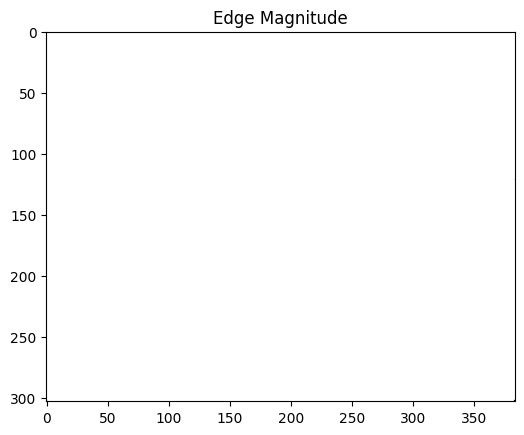

In [28]:
plt.title("Edge Magnitude")
plt.imshow(edge_mag_abs, cmap = 'gray')

In [29]:
edge_orient = (np.arctan2(gyabs,gxabs) * 180 / np.pi)%180
edge_orient

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [90., 45., 45., ..., 45., 45., 90.],
       [90., 45., 45., ..., 45., 45., 90.],
       ...,
       [90., 45., 45., ..., 45., 45., 90.],
       [90., 45., 45., ..., 45., 45., 90.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float16)

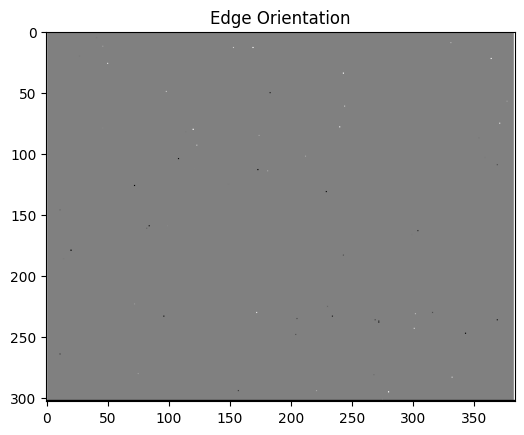

In [30]:
plt.title("Edge Orientation")
plt.imshow(edge_orient, cmap = 'gray')

Plotting them together for comparison

Text(0.5, 1.0, 'Edge Orientation')

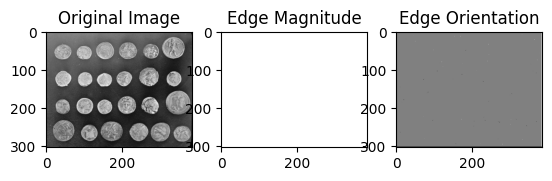

In [31]:
plt.subplot(1,3,1)
plt.imshow(image, cmap = 'gray')
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(edge_mag_abs, cmap = 'gray')
plt.title("Edge Magnitude")
plt.subplot(1,3,3)
plt.imshow(edge_orient, cmap = 'gray')
plt.title("Edge Orientation")


In [32]:
edge_orient1D = np.reshape(edge_orient, (rw*col,1))
edge_orient1D

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float16)

Plotting the Histogram

Text(0, 0.5, 'Frequency')

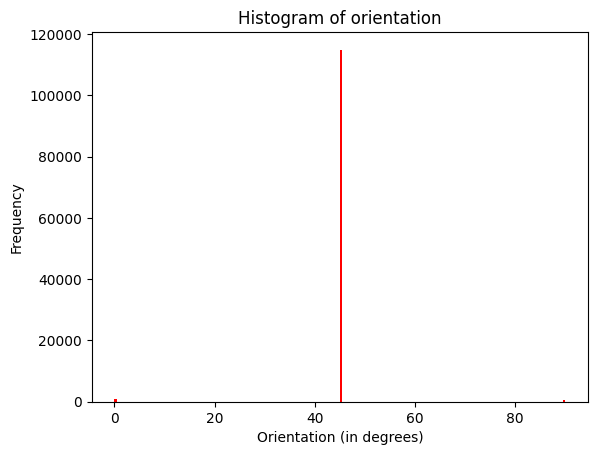

In [33]:
plt.hist(edge_orient1D, bins = 180, color="red")
plt.title("Histogram of orientation")
plt.xlabel("Orientation (in degrees)")
plt.ylabel("Frequency")

**Conclusion:**

Sobel filter is used to highlight edges of the given image.

It is observed that maximum frequency for the pixels is at an angle of 46 degrees.

If the size of filter is increased from 3x3 to 11x11, the filter is not able to highlight fine edges of the image. This is because large filter occupies larger space of the image which may not have a complete edge.